# ************************************************************************
# Name-Abhishek Kumar
# Batch No.-DS2309
# ************************************************************************

# ====================
# Titanic survived Project
# ====================

# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Attribute Information
Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv(r'C:\Users\ASHISH\Downloads\titanic_train.csv')

In [88]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Statistical Summary 

In [89]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## observations:-
This Titanic Dataset contains 891 rows & 12 columns.

We have 5 features with object Dtype & rest are numerical features Dtype.

## Checking Null Values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

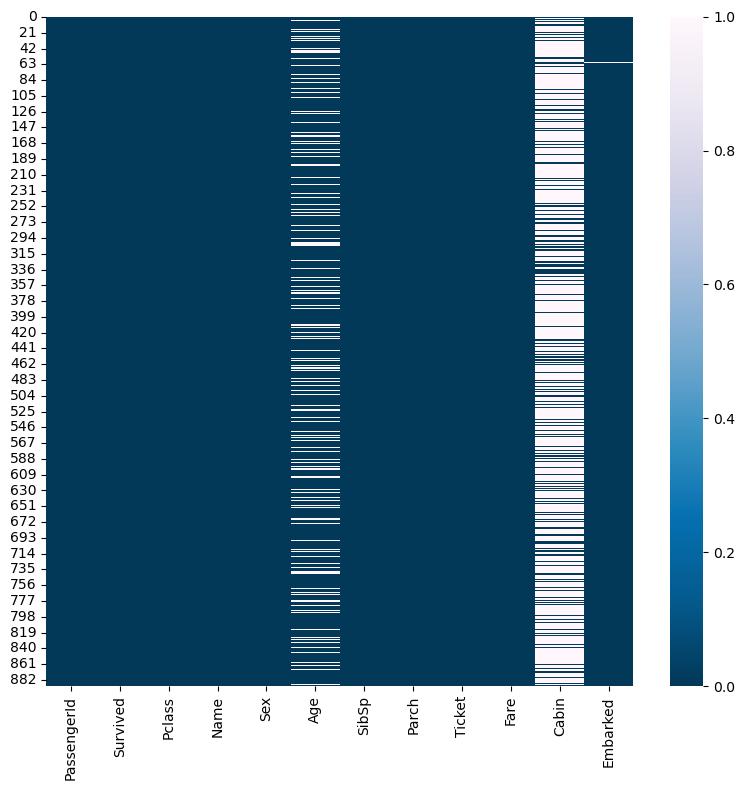

In [90]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull(),cmap = 'PuBu_r')
plt.show()

In [19]:
missing_val = df.isnull().sum().sort_values(ascending = False)
percentage_missing_val =(missing_val/len(df))*100
print(pd.concat([missing_val, percentage_missing_val], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


## Observations:-
Feature 'Cabin','Age' and 'Embarked' have null values.

77.10% of 'Cabin' data is null value,19.86% of 'Age' is null value, while 0.22% of 'Embarked' data is null value.

Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

In [91]:
df.drop(columns=['Cabin'],inplace = True)

In [148]:
df['Embarked'].fillna('S',inplace=True)

In [150]:
fill_age=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(), size=177)

In [151]:
df['Age'][np.isnan(df['Age'])]=fill_age

In [152]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

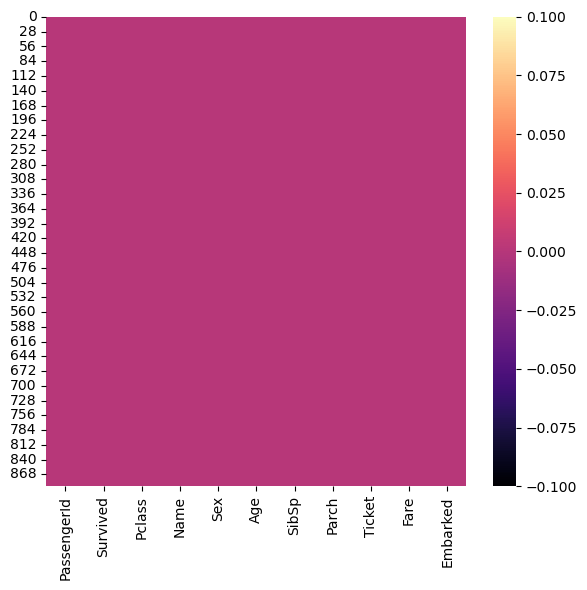

In [154]:
plt.figure(figsize = (6,6))
sns.heatmap(df.isnull(),cmap = 'magma')
plt.show()

In [155]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.524321,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.484101,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [156]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

### Observations:-
'Survived' = Target/Label column has 2 categories/classes.

'sex' = Feature column has 2 categories/classes.

'Pclass' = Feature column has 2 categories/classes.

'Embarked' = Feature column has 3 categories/classes.

'SibSp' = Feature column has 7 discrete values.

'Parch' = Feature column has 7 discrete values.

In [37]:
print('\nSurvival Rate of Passenges')
print(df['Survived'].value_counts())


Survival Rate of Passenges
0    549
1    342
Name: Survived, dtype: int64


In [145]:
print('\nGender-wise Survival Rate of Passengers')
df.groupby(['Sex','Survived'])['Survived'].count()


Gender-wise Survival Rate of Passengers


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

0 : Not Survived

1 : Survived

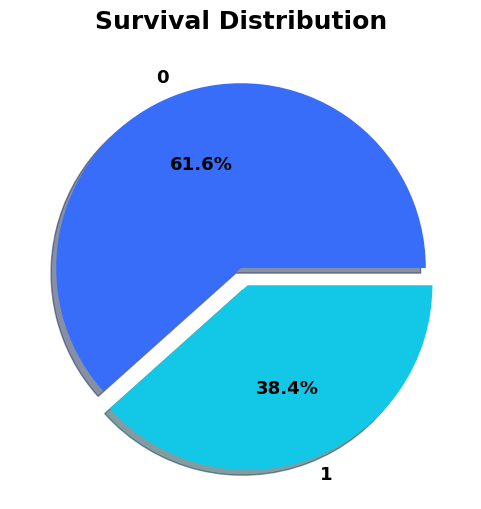

In [56]:
sns.set_palette('rainbow')
plt.figure(figsize=(7, 6))
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], textprops={'fontsize': 13, 'fontweight': 'bold'},autopct='%2.1f%%', shadow=True)
plt.title('Survival Distribution', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.show()

### Observation:-
In Titanic DataSet only 38.4 % people were survived.

### Passenger Class Vs Survivor 

In [83]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='PuBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [82]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='RdBu_r')

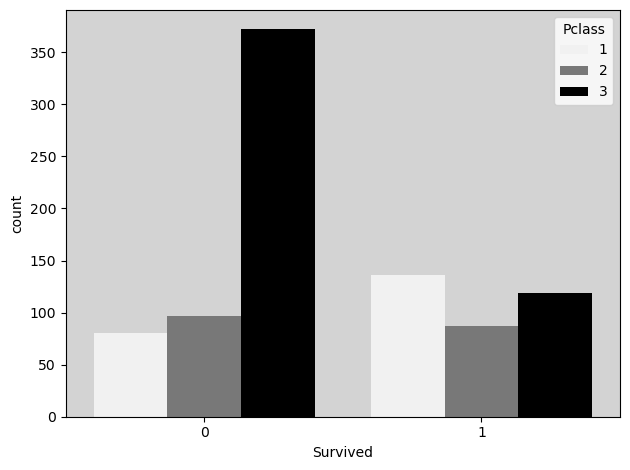

In [137]:
sns.countplot(x=df['Survived'],hue=df['Pclass'],color='k')
plt.gca().set_facecolor('lightgrey')
plt.show()

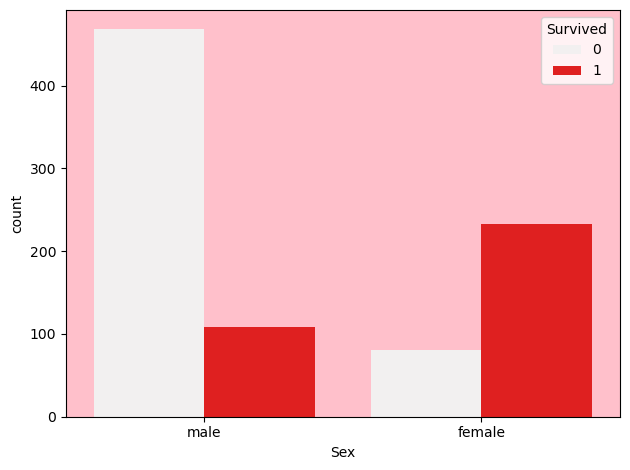

In [140]:
sns.countplot(x=df['Sex'],hue=df['Survived'],color='r')
plt.gca().set_facecolor('pink')
plt.show()

# Correlation

In [158]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.029374,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.056622,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.338632,0.083081,0.018443,-0.549500
Age,0.029374,-0.056622,-0.338632,1.000000,-0.230312,-0.177327,0.089128
SibSp,-0.057527,-0.035322,0.083081,-0.230312,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.177327,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089128,0.159651,0.216225,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

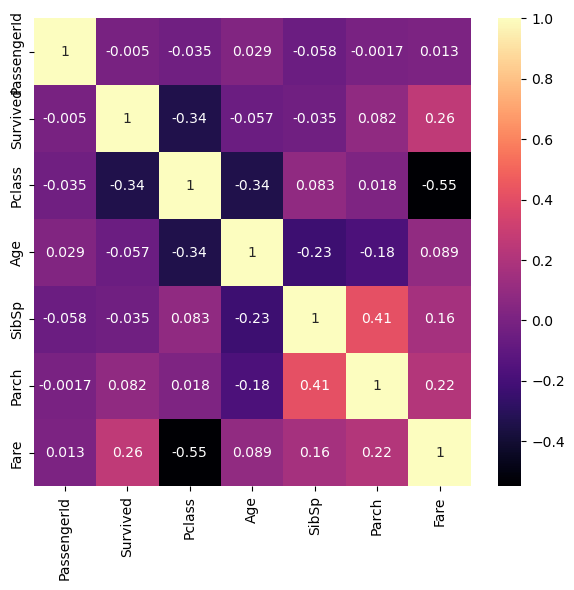

In [161]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show

## Outliers Detection 

In [162]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [163]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked']}

In [178]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked']

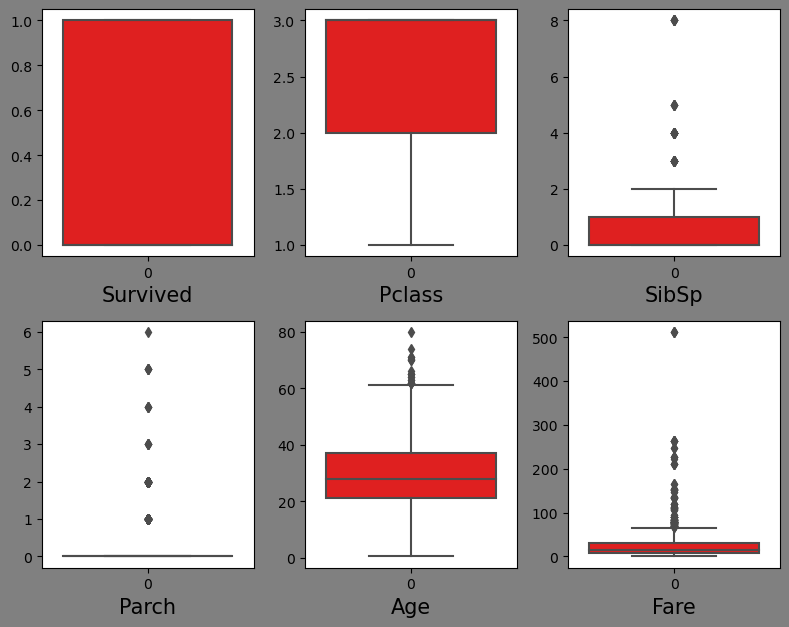

In [167]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(8,9),facecolor='grey')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [168]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [169]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [170]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [177]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Encoding Categorical Feature

In [179]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
for i in Categorical_features:
    df[i] = LE.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [180]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [181]:
X.shape

(879, 7)

# Machine Learning Model Building

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [203]:
clf=DecisionTreeClassifier()

In [204]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [205]:
Y_pred=clf.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7784090909090909

## Finding Best Random State

In [207]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [211]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# LogisticRegression 

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8863636363636364 on Random_state 275


In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (659, 7)
Training target vector size: (659,)
Test feature matrix size: (220, 7)
Test target vector size: (220,)


In [213]:
from sklearn.linear_model import LogisticRegression

In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8579545454545454


Confusion matrix of Logistics Regression : 
 [[104   7]
 [ 18  47]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       111
           1       0.87      0.72      0.79        65

    accuracy                           0.86       176
   macro avg       0.86      0.83      0.84       176
weighted avg       0.86      0.86      0.85       176



# Observation:-
Here LogisticRegression accuracy is the best accuracy.

Best accuracy is 0.8863636363636364 on Random_state 275.

# Saving The Model

In [241]:
import joblib
joblib.dump(log_reg,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

# Final Prediction

In [242]:
prediction = log_reg.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


# =====================THANKS=====================